In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, optimizers, layers, metrics
from training_functions import *

2023-07-17 14:52:29.728452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def architecture_1(input_shape, n_filters, filter_size):
    network = models.Sequential()
    network.add(layers.Input(shape=(*input_shape, 1)))
    network.add(layers.RandomFlip())
    network.add(layers.RandomBrightness(0.2, (0, 282)))
    network.add(layers.RandomContrast(0.2))
    network.add(layers.Normalization())
    network.add(layers.Conv2D(n_filters[0], filter_size[0], strides=1, activation='relu', padding='same'))
    network.add(layers.BatchNormalization())
    network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    network.add(layers.Conv2D(n_filters[1], filter_size[1], strides=1, activation='relu', padding='same'))
    network.add(layers.BatchNormalization())
    network.add(layers.Flatten())
    network.add(layers.Dense(2, activation='sigmoid'))
    return network

def architecture_3(input_shape, n_filters, filter_size):
    network = models.Sequential()
    network.add(layers.Input(shape=(*input_shape, 1)))
    network.add(layers.RandomFlip())
    network.add(layers.RandomRotation(1))
    network.add(layers.Normalization())
    network.add(layers.Conv2D(n_filters[0], filter_size[0], strides=1, activation='relu', padding='same'))
    network.add(layers.BatchNormalization())
    network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    network.add(layers.Conv2D(n_filters[1], filter_size[1], strides=1, activation='relu', padding='same'))
    network.add(layers.BatchNormalization())
    network.add(layers.Flatten())
    network.add(layers.Dense(n_filters[1], activation='sigmoid'))
    network.add(layers.BatchNormalization())
    network.add(layers.Dense(2, activation='sigmoid'))
    return network

In [8]:
path = "/Users/jackmango/Desktop/QUIRP - Work/Princeton/Data/06:23:23/imaging exposure time = 20ms"
data_dir = path
model_dir = path + '/model.h5'
n_tweezers = 100
n_loops = 20


In [10]:
model = architecture_1((17, 17), [16, 8], [3, 3])
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy',
               metrics=['binary_accuracy'])
model.save(model_dir)

In [11]:
stack, model, n_files = load(n_loops, n_tweezers, data_dir, model_dir)
crops_3x3, crops_1x1, info = process_images(stack, n_tweezers, n_loops * n_files)
training, labeling, fidelity_crops = split_training_fidelity(crops_1x1, crops_3x3, n_loops, n_files)

TypeError: object of type 'int' has no len()

In [6]:
labels, info = label_images(labeling, n_files - 1, n_loops, n_tweezers)
training, testing, info = build_dataset(training, labels)

NameError: name 'labeling' is not defined

In [13]:
print(np.max(stack))

319


Epoch 1/8
44450/44450 [==============================] - 297s 7ms/step - loss: 0.0769 - binary_accuracy: 0.9771 - val_loss: 0.0443 - val_binary_accuracy: 0.9847
Epoch 2/8
44450/44450 [==============================] - 282s 6ms/step - loss: 0.0593 - binary_accuracy: 0.9834 - val_loss: 0.0363 - val_binary_accuracy: 0.9883
Epoch 3/8
44450/44450 [==============================] - 282s 6ms/step - loss: 0.0568 - binary_accuracy: 0.9843 - val_loss: 0.0350 - val_binary_accuracy: 0.9891
Epoch 4/8
44450/44450 [==============================] - 277s 6ms/step - loss: 0.0555 - binary_accuracy: 0.9846 - val_loss: 0.0360 - val_binary_accuracy: 0.9893
Epoch 5/8
44450/44450 [==============================] - 286s 6ms/step - loss: 0.0547 - binary_accuracy: 0.9848 - val_loss: 0.0359 - val_binary_accuracy: 0.9891
Epoch 6/8
44450/44450 [==============================] - 271s 6ms/step - loss: 0.0541 - binary_accuracy: 0.9850 - val_loss: 0.0341 - val_binary_accuracy: 0.9890
Epoch 7/8
44450/44450 [===========

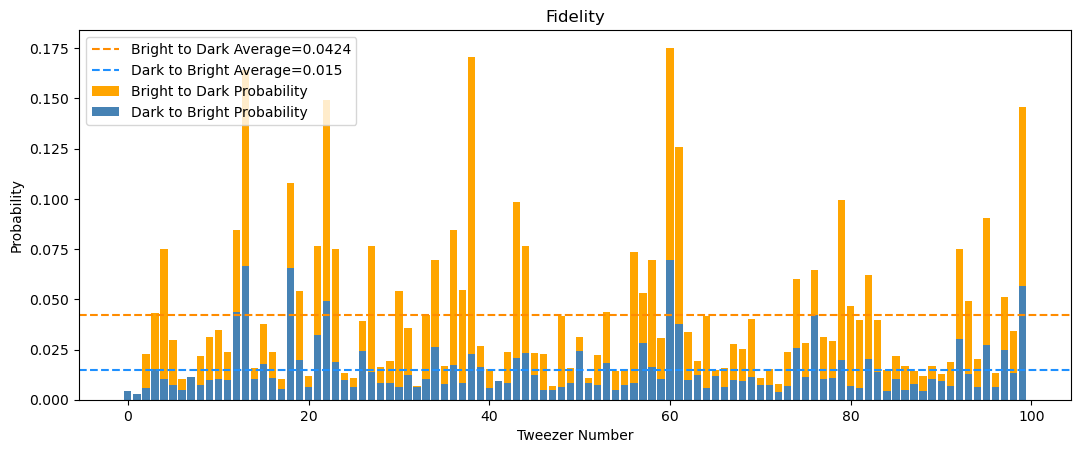

In [ ]:
history, testing_metrics = train_model(model, training, testing)
fidelity = analyze_fidelity(model, fidelity_crops, n_loops, n_tweezers)
model.save(model_dir)

In [ ]:
model.evaluate(testing[0], testing[1])

NameError: name 'model' is not defined